In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotnine import *
# from plotnine.data import mpg

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

from pyspark.sql.functions import *

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.regression import LinearRegressionSummary

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator
import tensorflow as tf 
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext
from pyspark.sql import functions

spark = SparkSession.builder.appName('US_LNG_Export').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/29 20:30:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/29 20:30:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
path = '/Users/michael/Desktop/PySpark Projects/LNG Export Project/Refinitiv_LSEG Natural Gas Analyst Written Exercise/USLNG.csv'

In [4]:
df = spark.read.csv(path)

In [5]:
df.show()

+--------------------+
|                 _c0|
+--------------------+
|Mcf;Americas;Nort...|
|lut.16;1 993 109;...|
|mar.16;3 270 357;...|
|kwi.16;6 310 025;...|
|maj.16;6 230 224;...|
|cze.16;12 803 718...|
|lip.16;6 073 832;...|
|sie.16;21 763 267...|
|wrz.16;3 315 009;...|
|paź.16;0;0;2 941 ...|
|lis.16;16 240 236...|
|gru.16;6 879 707;...|
|sty.17;13 615 300...|
|lut.17;17 357 366...|
|mar.17;16 612 708...|
|kwi.17;29 759 655...|
|maj.17;16 890 895...|
|cze.17;31 369 148...|
|lip.17;21 329 209...|
|sie.17;6 860 462;...|
+--------------------+
only showing top 20 rows



In [6]:
df = spark.read.option("delimiter", ";").csv(path)
df.show()

+------+----------+--------------+----------+-------------+----------+----------+--------------------+
|   _c0|       _c1|           _c2|       _c3|          _c4|       _c5|       _c6|                 _c7|
+------+----------+--------------+----------+-------------+----------+----------+--------------------+
|   Mcf|  Americas|Northeast Asia|   Mideast|South/SE Asia|    Europe|    Global|Month-on-month ch...|
|lut.16| 1 993 109|             0|         0|            0|         0| 1 993 109|                null|
|mar.16| 3 270 357|             0| 3 391 066|    2 843 575|         0| 9 504 998|           7 511 889|
|kwi.16| 6 310 025|             0|         0|            0| 3 700 091|10 010 116|             505 118|
|maj.16| 6 230 224|             0| 3 609 595|            0|         0| 9 839 819|            -170 297|
|cze.16|12 803 718|             0|         0|    3 617 006|         0|16 420 724|           6 580 905|
|lip.16| 6 073 832|     3 132 116| 3 566 496|            0| 2 930 435|15 

In [7]:
df = spark.read.option("delimiter", ";").option("header", True).csv(path)
df.show()

+------+----------+--------------+----------+-------------+----------+----------+---------------------+
|   Mcf|  Americas|Northeast Asia|   Mideast|South/SE Asia|    Europe|    Global|Month-on-month change|
+------+----------+--------------+----------+-------------+----------+----------+---------------------+
|lut.16| 1 993 109|             0|         0|            0|         0| 1 993 109|                 null|
|mar.16| 3 270 357|             0| 3 391 066|    2 843 575|         0| 9 504 998|            7 511 889|
|kwi.16| 6 310 025|             0|         0|            0| 3 700 091|10 010 116|              505 118|
|maj.16| 6 230 224|             0| 3 609 595|            0|         0| 9 839 819|             -170 297|
|cze.16|12 803 718|             0|         0|    3 617 006|         0|16 420 724|            6 580 905|
|lip.16| 6 073 832|     3 132 116| 3 566 496|            0| 2 930 435|15 702 879|             -717 845|
|sie.16|21 763 267|             0|         0|    3 701 179|     

In [8]:
df = df.withColumnRenamed("Mcf", "Date")

In [9]:
df.show(200)

+--------------------+-------------+--------------+----------+-------------+-----------+-----------+---------------------+
|                Date|     Americas|Northeast Asia|   Mideast|South/SE Asia|     Europe|     Global|Month-on-month change|
+--------------------+-------------+--------------+----------+-------------+-----------+-----------+---------------------+
|              lut.16|    1 993 109|             0|         0|            0|          0|  1 993 109|                 null|
|              mar.16|    3 270 357|             0| 3 391 066|    2 843 575|          0|  9 504 998|            7 511 889|
|              kwi.16|    6 310 025|             0|         0|            0|  3 700 091| 10 010 116|              505 118|
|              maj.16|    6 230 224|             0| 3 609 595|            0|          0|  9 839 819|             -170 297|
|              cze.16|   12 803 718|             0|         0|    3 617 006|          0| 16 420 724|            6 580 905|
|              l

In [10]:
df.dtypes

[('Date', 'string'),
 ('Americas', 'string'),
 ('Northeast Asia', 'string'),
 ('Mideast', 'string'),
 ('South/SE Asia', 'string'),
 ('Europe', 'string'),
 ('Global', 'string'),
 ('Month-on-month change', 'string')]

In [11]:
### Delete space between numbers

df = df.withColumn("Americas", regexp_replace("Americas", r" ",""))
df = df.withColumn("Northeast Asia", regexp_replace("Northeast Asia", r" ",""))
df = df.withColumn("Mideast", regexp_replace("Mideast", r" ",""))
df = df.withColumn("South/SE Asia", regexp_replace("South/SE Asia", r" ",""))
df = df.withColumn("Europe", regexp_replace("Europe", r" ",""))
df = df.withColumn("Global", regexp_replace("Global", r" ",""))
df = df.withColumn("Month-on-month change", regexp_replace("Month-on-month change", r" ",""))

In [12]:
df = df.withColumnRenamed("Northeast Asia", "Northeast_Asia")
df = df.withColumnRenamed("South/SE Asia", "Asia")
df = df.withColumnRenamed("Month-on-month change", "Month_on_month")

In [13]:
df = df.withColumn('Americas', df.Americas.cast(IntegerType()))
df = df.withColumn('Northeast_Asia', df.Northeast_Asia.cast(IntegerType()))
df = df.withColumn('Mideast', df.Mideast.cast(IntegerType()))
df = df.withColumn('Asia', df.Asia.cast(IntegerType()))
df = df.withColumn('Europe', df.Europe.cast(IntegerType()))
df = df.withColumn('Global', df.Global.cast(IntegerType()))
df = df.withColumn('Month-on-month change', df.Month_on_month.cast(IntegerType()))

In [14]:
df.show()

+------+--------+--------------+--------+-------+--------+--------+--------------+---------------------+
|  Date|Americas|Northeast_Asia| Mideast|   Asia|  Europe|  Global|Month_on_month|Month-on-month change|
+------+--------+--------------+--------+-------+--------+--------+--------------+---------------------+
|lut.16| 1993109|             0|       0|      0|       0| 1993109|          null|                 null|
|mar.16| 3270357|             0| 3391066|2843575|       0| 9504998|       7511889|              7511889|
|kwi.16| 6310025|             0|       0|      0| 3700091|10010116|        505118|               505118|
|maj.16| 6230224|             0| 3609595|      0|       0| 9839819|       -170297|              -170297|
|cze.16|12803718|             0|       0|3617006|       0|16420724|       6580905|              6580905|
|lip.16| 6073832|       3132116| 3566496|      0| 2930435|15702879|       -717845|              -717845|
|sie.16|21763267|             0|       0|3701179|      

In [15]:
df.dropna()
df.show()

+------+--------+--------------+--------+-------+--------+--------+--------------+---------------------+
|  Date|Americas|Northeast_Asia| Mideast|   Asia|  Europe|  Global|Month_on_month|Month-on-month change|
+------+--------+--------------+--------+-------+--------+--------+--------------+---------------------+
|lut.16| 1993109|             0|       0|      0|       0| 1993109|          null|                 null|
|mar.16| 3270357|             0| 3391066|2843575|       0| 9504998|       7511889|              7511889|
|kwi.16| 6310025|             0|       0|      0| 3700091|10010116|        505118|               505118|
|maj.16| 6230224|             0| 3609595|      0|       0| 9839819|       -170297|              -170297|
|cze.16|12803718|             0|       0|3617006|       0|16420724|       6580905|              6580905|
|lip.16| 6073832|       3132116| 3566496|      0| 2930435|15702879|       -717845|              -717845|
|sie.16|21763267|             0|       0|3701179|      

In [16]:
df = df.drop('Month_on_month')
df.show()

+------+--------+--------------+--------+-------+--------+--------+---------------------+
|  Date|Americas|Northeast_Asia| Mideast|   Asia|  Europe|  Global|Month-on-month change|
+------+--------+--------------+--------+-------+--------+--------+---------------------+
|lut.16| 1993109|             0|       0|      0|       0| 1993109|                 null|
|mar.16| 3270357|             0| 3391066|2843575|       0| 9504998|              7511889|
|kwi.16| 6310025|             0|       0|      0| 3700091|10010116|               505118|
|maj.16| 6230224|             0| 3609595|      0|       0| 9839819|              -170297|
|cze.16|12803718|             0|       0|3617006|       0|16420724|              6580905|
|lip.16| 6073832|       3132116| 3566496|      0| 2930435|15702879|              -717845|
|sie.16|21763267|             0|       0|3701179|       0|25464446|              9761567|
|wrz.16| 3315009|             0| 6819896|3638872| 2941284|16715061|             -8749385|
|paź.16|  

In [17]:
df.select(max(df.Europe).alias('Maximum_Europe')).show()

+--------------+
|Maximum_Europe|
+--------------+
|     144150244|
+--------------+



In [18]:
df.count()

265

In [19]:
df = df.toPandas()
df = df.iloc[:68,:]
df = spark.createDataFrame(df)

In [20]:
# Save into CSV format
df.write.format("csv").save("/Users/michael/Desktop/PySpark Projects/LNG Export Project/US_LNG_EXPORT")

In [ ]:
### Analyst Visualisation 

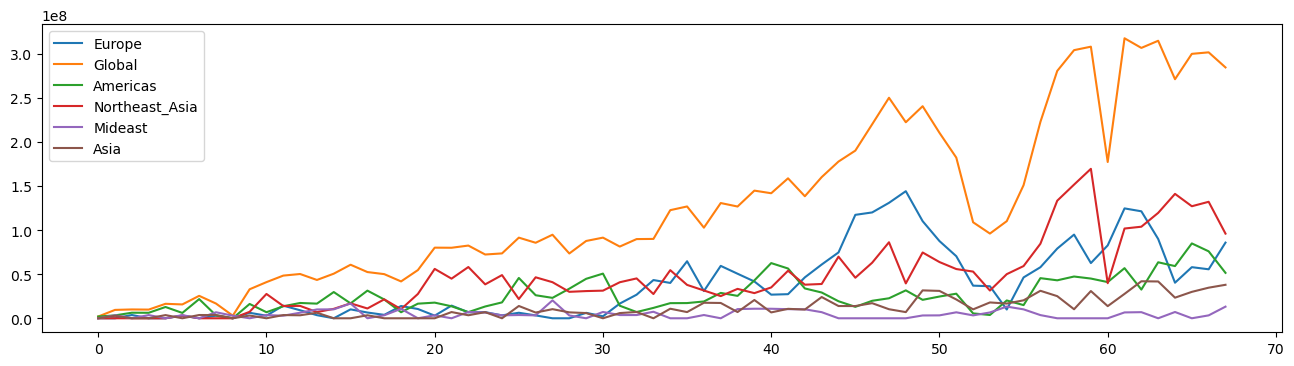

In [21]:
fig, ax = plt.subplots(figsize = (16,4))

df = df.toPandas()

ax.plot(df['Europe'], label = 'Europe')
ax.plot(df['Global'], label = 'Global')
ax.plot(df['Americas'], label = 'Americas')
ax.plot(df['Northeast_Asia'], label = 'Northeast_Asia')
ax.plot(df['Mideast'], label = 'Mideast')
ax.plot(df['Asia'], label = 'Asia')


ax.legend()

plt.show()

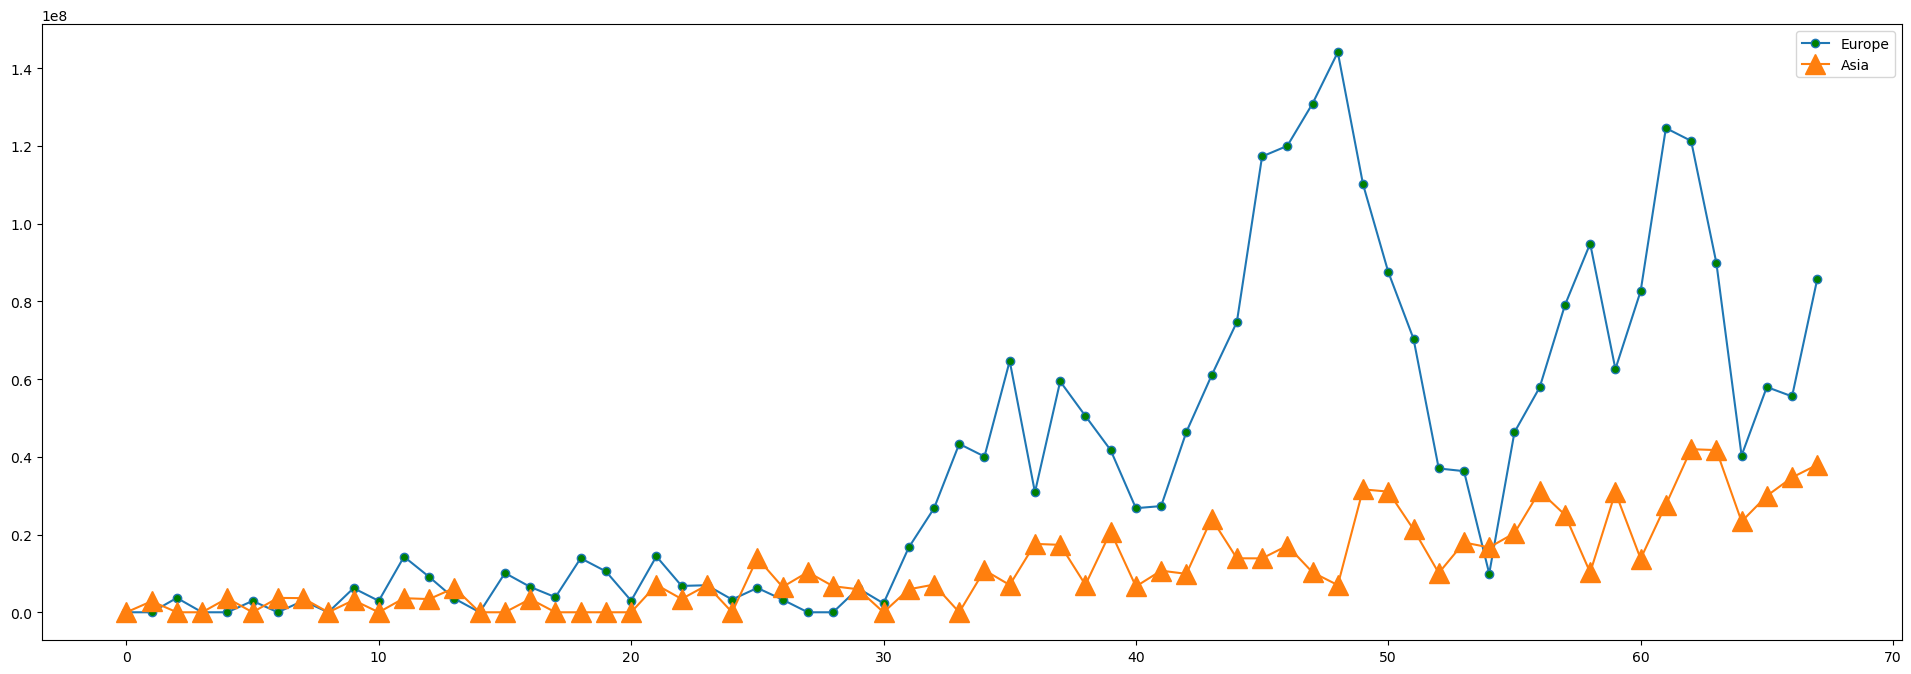

In [22]:
n = 68
fig, ax = plt.subplots(figsize = (24,8))

ax.plot(df['Europe'][-n:], label = 'Europe', marker = 'o', markerfacecolor = 'green')
ax.plot(df['Asia'][-n:], label = 'Asia', marker = '^', markersize = 15)

ax.legend()

plt.show()

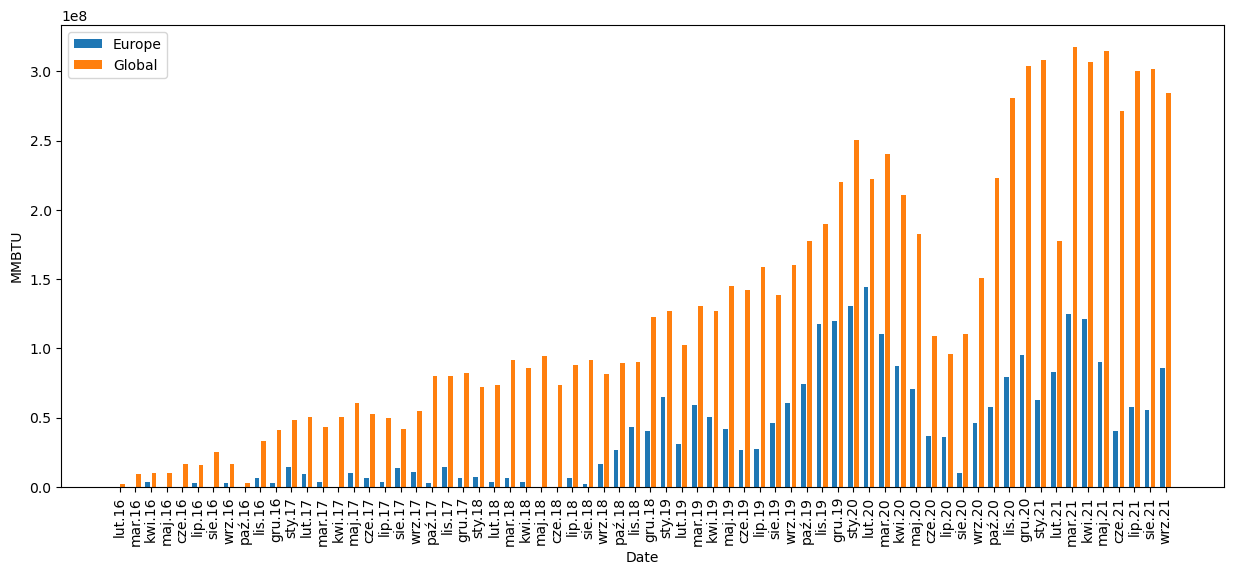

In [23]:
fig, ax = plt.subplots(figsize = (15,6))

x = np.arange(len(df))
width = 0.3

ax.bar(x - 0.2, df['Europe'], width = 0.3, label = 'Europe')
ax.bar(x + 0.2, df['Global'], width = 0.3, label = 'Global')

ax.xaxis.set_tick_params(rotation = 90)
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_ylabel('MMBTU')
ax.set_xticklabels(df['Date'])

plt.legend()
plt.show()

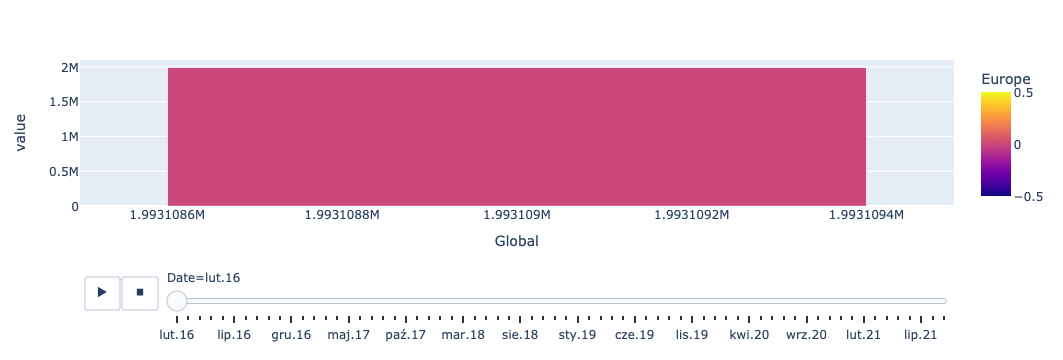

In [24]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

px.bar(data_frame = df,
           x = 'Global',
           y = ['Europe', 'Americas'],
           color = 'Europe',
           animation_frame = 'Date')



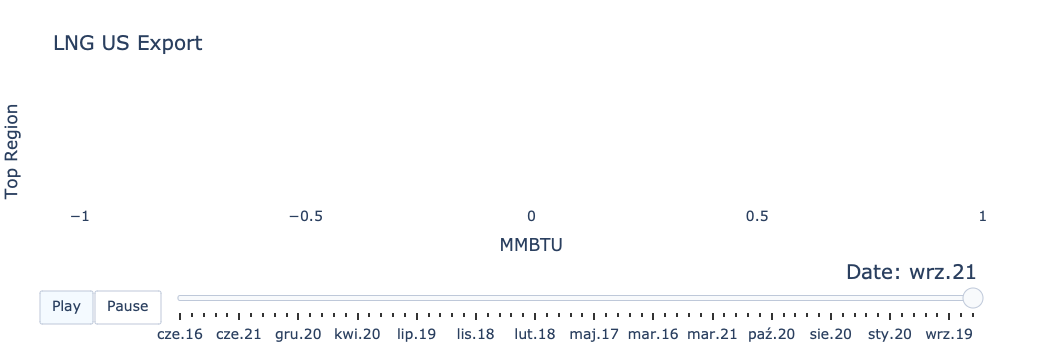

In [26]:
from raceplotly.plots import barplot
import bar_chart_race as bcr


#df = df.toPandas()
my_raceplot = barplot(df,  item_column= 'Global',
                      value_column= ['Europe', 'Asia', 'Northeast_Asia', 'Americas'],
                      time_column='Date')

my_raceplot.plot(title = 'LNG US Export', item_label = 'Top Region', value_label = 'MMBTU', frame_duration = 600)

In [ ]:
## Machine Learning 

In [25]:
df = spark.createDataFrame(df)

X_column_names = ['Asia', 'Europe', 'Americas', 'Northeast_Asia', 'Mideast']


taget_column_name = ['Europe']

# Convert features columns into a columns where the values are featrurees vectors
from pyspark.ml.feature import VectorAssembler
v_asmblr = VectorAssembler(inputCols = X_column_names, outputCol = 'Fvec')
df = v_asmblr.transform(df)
X = df.select(['Europe', 'Asia', 'Americas', 'Fvec'])
X.show(3)

+---------+---------+---------+--------------------+
|   Europe|     Asia| Americas|                Fvec|
+---------+---------+---------+--------------------+
|      0.0|      0.0|1993109.0| (5,[2],[1993109.0])|
|      0.0|2843575.0|3270357.0|[2843575.0,0.0,32...|
|3700091.0|      0.0|6310025.0|(5,[1,2],[3700091...|
+---------+---------+---------+--------------------+
only showing top 3 rows



In [26]:
df.show()

+------+-----------+--------------+-----------+---------+-----------+-----------+---------------------+--------------------+
|  Date|   Americas|Northeast_Asia|    Mideast|     Asia|     Europe|     Global|Month-on-month change|                Fvec|
+------+-----------+--------------+-----------+---------+-----------+-----------+---------------------+--------------------+
|lut.16|  1993109.0|           0.0|        0.0|      0.0|        0.0|  1993109.0|                  NaN| (5,[2],[1993109.0])|
|mar.16|  3270357.0|           0.0|  3391066.0|2843575.0|        0.0|  9504998.0|            7511889.0|[2843575.0,0.0,32...|
|kwi.16|  6310025.0|           0.0|        0.0|      0.0|  3700091.0|1.0010116E7|             505118.0|(5,[1,2],[3700091...|
|maj.16|  6230224.0|           0.0|  3609595.0|      0.0|        0.0|  9839819.0|            -170297.0|(5,[2,4],[6230224...|
|cze.16|1.2803718E7|           0.0|        0.0|3617006.0|        0.0|1.6420724E7|            6580905.0|(5,[0,2],[3617006...|


In [27]:
trainset, testset = X.randomSplit([0.8, 0.2])

In [28]:
model = LinearRegression(featuresCol='Fvec', labelCol='Europe')
model = model.fit(trainset)
print(model.coefficients)
print(model.intercept)

23/08/29 20:32:31 WARN Instrumentation: [6dc19293] regParam is zero, which might cause numerical instability and overfitting.
23/08/29 20:32:33 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/08/29 20:32:33 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/08/29 20:32:33 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


[0.0,1.0,-3.3764029059622803e-17,-2.9075547224561338e-18,7.158341518526816e-18]
1.7950488858616064e-09


In [29]:
model.evaluate(testset).predictions.show(40)

+------------+-----------+-----------+--------------------+--------------------+
|      Europe|       Asia|   Americas|                Fvec|          prediction|
+------------+-----------+-----------+--------------------+--------------------+
|         0.0|        0.0|  6230224.0|(5,[2,4],[6230224...|1.610530135431214E-9|
|   2941284.0|  3638872.0|  3315009.0|[3638872.0,294128...|   2941284.000000002|
|         0.0|        0.0|2.9759655E7|[0.0,0.0,2.975965...|8.316694222821131...|
| 1.3914146E7|        0.0|  6860462.0|[0.0,1.3914146E7,...|1.3914146000000002E7|
| 1.4394066E7|  7057436.0|1.3594894E7|[7057436.0,1.4394...|1.4394066000000002E7|
|   3278774.0|        0.0|1.8025716E7|[0.0,3278774.0,1....|  3278774.0000000014|
| 4.3351469E7|        0.0|1.1773226E7|[0.0,4.3351469E7,...|         4.3351469E7|
| 5.0526019E7|  7062498.0|2.5405983E7|[7062498.0,5.0526...|         5.0526019E7|
| 6.0967946E7| 2.410062E7|2.9227235E7|[2.410062E7,6.096...|         6.0967946E7|
|1.17324359E8|1.3878019E7|1.

In [30]:
model = model.evaluate(testset)

In [31]:
print(f"""
Linear Regression Results Report
==================================
RMSE:\t {model.rootMeanSquaredError}
MSE:\t {model.meanSquaredError}
R2:\t {model.r2}
Adj R2:\t{model.r2adj}
==================================
"""
)


Linear Regression Results Report
RMSE:	 1.093012839110877e-09
MSE:	 1.1946770664612198e-18
R2:	 1.0
Adj R2:	1.0



In [32]:
model = LinearRegression(featuresCol='Fvec', labelCol='Europe', predictionCol='predvalue', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False)
model = model.fit(trainset)
print(model.coefficients)
print(model.intercept)

[0.08110859478865105,0.9835230499920069,-0.06625320928295268,0.02161265431103473,-0.025895731211351435]
591582.7141198778


In [33]:
standardScaler = StandardScaler(inputCol="Fvec", outputCol="Fvec_scaled")
scaled_df = standardScaler.fit(X).transform(X)

In [34]:
scaled_df.select("Fvec", "Fvec_scaled").show(30, truncate=False)

+---------------------------------------------------------+--------------------------------------------------------------------------------------------------+
|Fvec                                                     |Fvec_scaled                                                                                       |
+---------------------------------------------------------+--------------------------------------------------------------------------------------------------+
|(5,[2],[1993109.0])                                      |(5,[2],[0.10526460627774128])                                                                     |
|[2843575.0,0.0,3270357.0,0.0,3391066.0]                  |[0.24487091967666957,0.0,0.17272153303841142,0.0,0.7348966704000096]                              |
|(5,[1,2],[3700091.0,6310025.0])                          |(5,[1,2],[0.09135377435148806,0.33325939385538095])                                               |
|(5,[2,4],[6230224.0,3609595.0])              

In [35]:
train_data, test_data = scaled_df.randomSplit([0.8,0.2], seed=42)

In [36]:
train_data.columns

['Europe', 'Asia', 'Americas', 'Fvec', 'Fvec_scaled']

In [37]:
lr = (LinearRegression(featuresCol='Fvec_scaled', labelCol="Europe", predictionCol='predvalue', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [38]:
linearModel = lr.fit(train_data)
linearModel.coefficients

DenseVector([1694438.2398, 38244295.7729, -771083.5314, -0.0, -460911.4109])

In [39]:
linearModel.intercept

1791921.4799615175

In [40]:
predictions = linearModel.transform(test_data)

In [41]:
predandlabels = predictions.select("predvalue", "Europe")

In [42]:
predandlabels.show(68)

+--------------------+------------+
|           predvalue|      Europe|
+--------------------+------------+
|  1734935.1392539595|         0.0|
|   4283935.199133696|   2941284.0|
|  1498062.8132912528|         0.0|
|   9536326.163128486|   9093960.0|
|    8969608.45707831| 1.0106782E7|
|   4245284.653339724|   3878871.0|
|1.5859463559753817E7| 1.4394066E7|
|5.9266244691829376E7| 5.9426915E7|
| 4.466235927815898E7| 4.6409769E7|
|1.1407034723412192E8|1.17324359E8|
| 1.260131175801255E8|1.30948272E8|
| 6.957870435061042E7| 7.0411421E7|
|1.3763629797357455E8|1.44150244E8|
| 5.880456667367477E7|  5.790458E7|
+--------------------+------------+



In [43]:
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

RMSE: 1407300.918703266


In [44]:
print(f"""
Linear Regression Results Report
==================================
RMSE:\t {linearModel.summary.rootMeanSquaredError}
MSE:\t {linearModel.summary.meanSquaredError}
R2:\t {linearModel.summary.r2}
Adj R2:\t{linearModel.summary.r2adj}
==================================
"""
)


Linear Regression Results Report
RMSE:	 1407300.918703266
MSE:	 1980495875783.0564
R2:	 0.9985568124156156
Adj R2:	0.9984064803755756



In [ ]:
### Prediction 

In [45]:
df = df.toPandas()

indexNames = df[ df['Europe'] < 0 ].index
df.drop(indexNames , inplace=True)
df.shape
time_step = [i for i in range(df.shape[0])]
temps = df[['Europe']]

series = np.array(temps)
time = np.array(time_step)

split_time = 7000
time_train = time[:split_time]
x_train = series[:split_time]
x_label_train = df[['Date']][:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]
x_label_valid = df[['Date']][split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

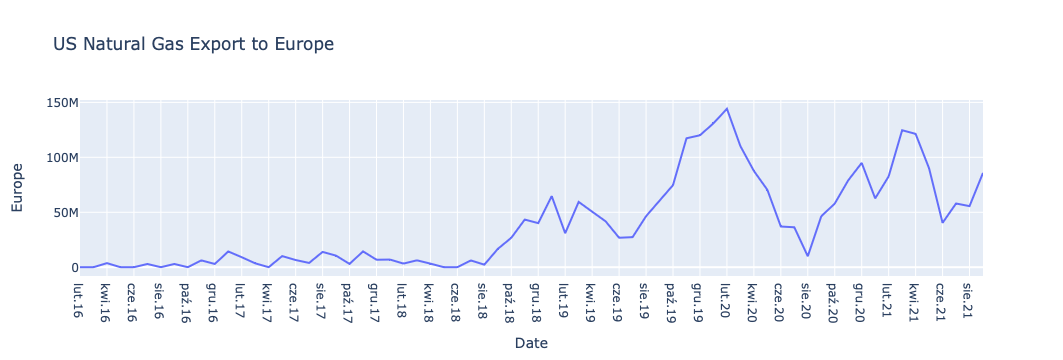

In [46]:
fig = px.line(df, x = 'Date', y = "Europe", title = "US Natural Gas Export to Europe")
fig.update_xaxes(nticks = 35)
fig.show()

In [47]:
def plot_series(time, series, format = "-", start = 0, end = None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Europe")
    plt.grid(True)

In [48]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis = -1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [49]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [52]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32, kernel_size = 5,
                      strides = 1, padding = "causal",
                      activation = "relu",
                      input_shape = [None, 1]),
  tf.keras.layers.LSTM(64, return_sequences = True),
  tf.keras.layers.LSTM(64, return_sequences = True),
  tf.keras.layers.Dense(30, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-8, momentum = 0.9)
model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])
history_1 = model.fit(train_set, epochs=70, callbacks = [lr_schedule])

2023-08-28 02:50:21.730715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None))>
(68, 1)
Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.0000e-08
Epoch 2/70
1/1 [==============================] - 0s 39ms/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.1220e-08
Epoch 3/70
1/1 [==============================] - 0s 33ms/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.2589e-08
Epoch 4/70
1/1 [==============================] - 0s 32ms/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.4125e-08
Epoch 5/70
1/1 [==============================] - 0s 33ms/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.5849e-08
Epoch 6/70
1/1 [==============================] - 0s 32ms/step - loss: 39185808.0000 - mae: 39185808.0000 - lr: 1.7783e-08
Epoch 7/70
1/1 [==============================] - 0s 32ms/step - loss: 39185808.0000 - mae

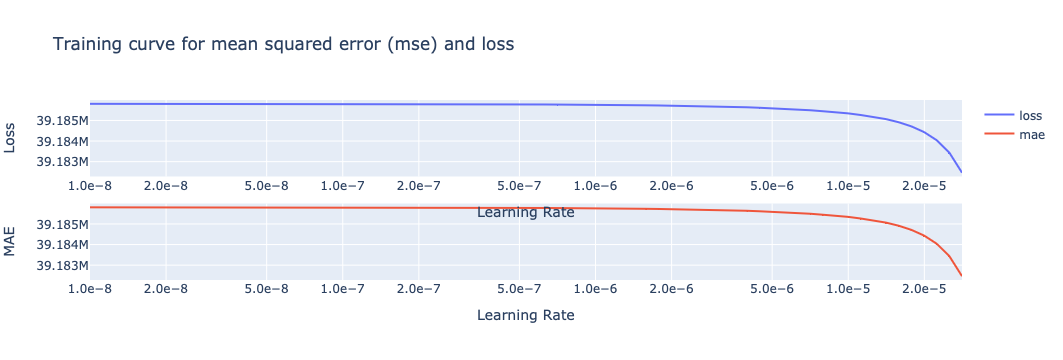

In [53]:
fig = make_subplots(rows=2, cols=1, start_cell="top-left")

fig.add_trace(go.Scatter(x = history_1.history["lr"], y = history_1.history["loss"], name = 'loss'), 
              row = 1, col = 1, )

fig.add_trace(go.Scatter(x = history_1.history["lr"], y = history_1.history["mae"], name = 'mae'),
              row = 2, col = 1)

fig.update_xaxes(title_text="Learning Rate", type="log", tickformat='.1e', row = 1, col = 1)
fig.update_yaxes(title_text="Loss", row = 1, col = 1)

fig.update_xaxes(title_text="Learning Rate", type="log", tickformat='.1e', row = 2, col = 1)
fig.update_yaxes(title_text="MAE", row = 2, col = 1)

fig.update_layout(
    height = 800,
    title_text = 'Training curve for mean squared error (mse) and loss '
)

fig.show()

In [56]:
index = np.argmin(history_1.history["loss"])
learning_rate = history_1.history["lr"][index]
print(learning_rate)

2.818383e-05


Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 39185760.0000 - mae: 39185760.0000
Epoch 2/250
1/1 [==============================] - 0s 41ms/step - loss: 39185740.0000 - mae: 39185740.0000
Epoch 3/250
1/1 [==============================] - 0s 34ms/step - loss: 39185696.0000 - mae: 39185696.0000
Epoch 4/250
1/1 [==============================] - 0s 32ms/step - loss: 39185632.0000 - mae: 39185632.0000
Epoch 5/250
1/1 [==============================] - 0s 32ms/step - loss: 39185544.0000 - mae: 39185544.0000
Epoch 6/250
1/1 [==============================] - 0s 33ms/step - loss: 39185416.0000 - mae: 39185416.0000
Epoch 7/250
1/1 [==============================] - 0s 32ms/step - loss: 39185484.0000 - mae: 39185484.0000
Epoch 8/250
1/1 [==============================] - 0s 33ms/step - loss: 39185336.0000 - mae: 39185336.0000
Epoch 9/250
1/1 [==============================] - 0s 33ms/step - loss: 39185056.0000 - mae: 39185056.0000
Epoch 10/250
1/1 [=====================

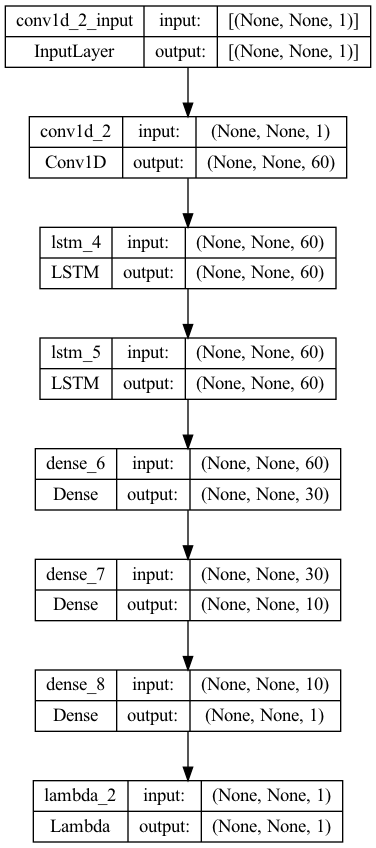

In [57]:
def build_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters = 60, kernel_size = 5,
                          strides = 1, padding = "causal",
                          activation = "relu",
                          input_shape = [None, 1]),
      tf.keras.layers.LSTM(60, return_sequences = True),
      tf.keras.layers.LSTM(60, return_sequences = True),
      tf.keras.layers.Dense(30, activation = "relu"),
      tf.keras.layers.Dense(10, activation = "relu"),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x: x * 400)
    ])

    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum = 0.9)
    model.compile(loss = tf.keras.losses.Huber(),
                  optimizer = optimizer,
                  metrics = ["mae"])
    return model

epochs = 250
model = build_model()
history_2 = model.fit(train_set, epochs = epochs)
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [58]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

1/1 [==============================] - 1s 545ms/step


In [62]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

array([], dtype=float32)

In [63]:
print(rnn_forecast)

[]


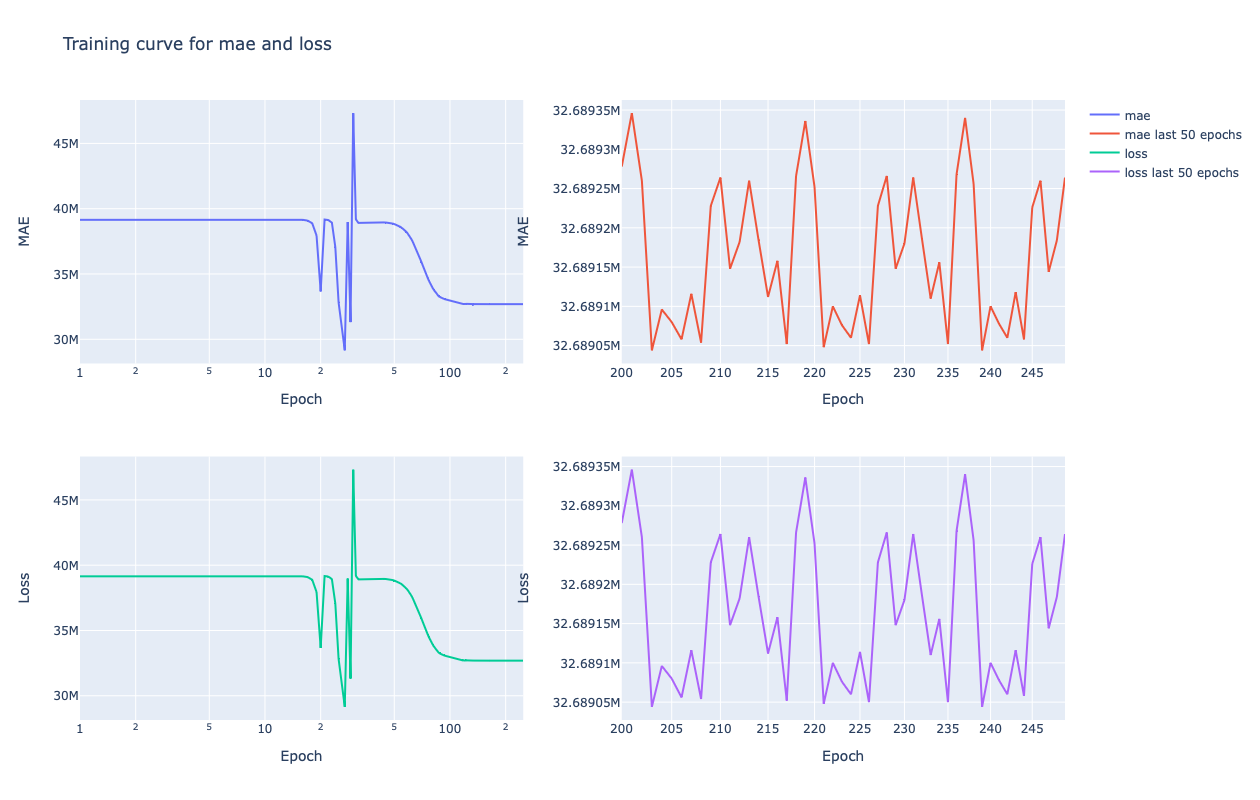

In [64]:
zoom_begin = epochs - 50
zoon_end = epochs + 1
x_last = list(range(zoom_begin, zoon_end))

fig = make_subplots(rows = 2, cols = 2, start_cell = "top-left")

fig.add_trace(go.Scatter(y = history_2.history["mae"], name = 'mae'), row = 1, col = 1)
fig.update_xaxes(title_text="Epoch", type="log", row = 1, col = 1)
fig.update_yaxes(title_text="MAE", row = 1, col = 1)

fig.add_trace(go.Scatter(x = x_last, y = history_2.history["mae"][zoom_begin:], name = 'mae last 50 epochs'), row = 1, col = 2)
fig.update_xaxes(title_text="Epoch", type="log", row = 1, col = 2)
fig.update_yaxes(title_text="MAE", row = 1, col = 2)

fig.add_trace(go.Scatter(y = history_2.history["loss"], name='loss'), row = 2, col = 1)
fig.update_xaxes(title_text="Epoch", type="log", row = 2, col = 1)
fig.update_yaxes(title_text="Loss", row = 2, col = 1)

fig.add_trace(go.Scatter(x = x_last, y = history_2.history["loss"][zoom_begin:], name = 'loss last 50 epochs'), row = 2, col = 2)
fig.update_xaxes(title_text="Epoch", type="log", row = 2, col = 2)
fig.update_yaxes(title_text="Loss", row = 2, col = 2)

fig.update_layout(height = 800, title_text = 'Training curve for mae and loss ')

fig.show()

In [ ]:
### LSTM MODEL 

In [79]:
#df = df.toPandas()
data = df['Europe']

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

65

In [80]:
df.shape

(68, 9)

In [81]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

dataset = dataset.reshape(-1,1)

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.        ],
       [0.0256683 ],
       [0.        ],
       [0.        ],
       [0.02032903],
       [0.        ],
       [0.02040429],
       [0.        ],
       [0.04310612],
       [0.02036513],
       [0.09928383],
       [0.06308668],
       [0.02442524],
       [0.        ],
       [0.07011283],
       [0.04530313],
       [0.02690853],
       [0.0965253 ],
       [0.07299872],
       [0.02067476],
       [0.09985461],
       [0.04705245],
       [0.04828969],
       [0.02274553],
       [0.04347368],
       [0.02256395],
       [0.        ],
       [0.        ],
       [0.04270936],
       [0.01593056],
       [0.11568723],
       [0.18554909],
       [0.30073809],
       [0.27807902],
       [0.44876102],
       [0.21434644],
       [0.41225678],
       [0.35050942],
       [0.28953727],
       [0.18589568],
       [0.1896284 ],
       [0.32195415],
       [0.42294723],
       [0.5181241 ],
       [0.8139033 ],
       [0.83286202],
       [0.908

In [82]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.        , 0.        , 0.0256683 , 0.        , 0.        ,
       0.02032903, 0.        , 0.02040429, 0.        , 0.04310612,
       0.02036513, 0.09928383, 0.06308668, 0.02442524, 0.        ,
       0.07011283, 0.04530313, 0.02690853, 0.0965253 , 0.07299872,
       0.02067476, 0.09985461, 0.04705245, 0.04828969, 0.02274553,
       0.04347368, 0.02256395, 0.        , 0.        , 0.04270936,
       0.01593056, 0.11568723, 0.18554909, 0.30073809, 0.27807902,
       0.44876102, 0.21434644, 0.41225678, 0.35050942, 0.28953727,
       0.18589568, 0.1896284 , 0.32195415, 0.42294723, 0.5181241 ,
       0.8139033 , 0.83286202, 0.90841519, 1.        , 0.76425994,
       0.60766411, 0.48845856, 0.25679762, 0.25203656, 0.06906425,
       0.32146897, 0.40169602, 0.54840465, 0.65840036, 0.43432515])]
[0.5734313776118201]

[array([0.        , 0.        , 0.0256683 , 0.        , 0.        ,
       0.02032903, 0.        , 0.02040429, 0.        , 0.04310612,
       0.02036513, 0.09928383, 0.063

(5, 60, 1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5/5 [==============================] - 2s 23ms/step - loss: 0.1873


In [84]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 0s 427ms/step


45634820.566138245

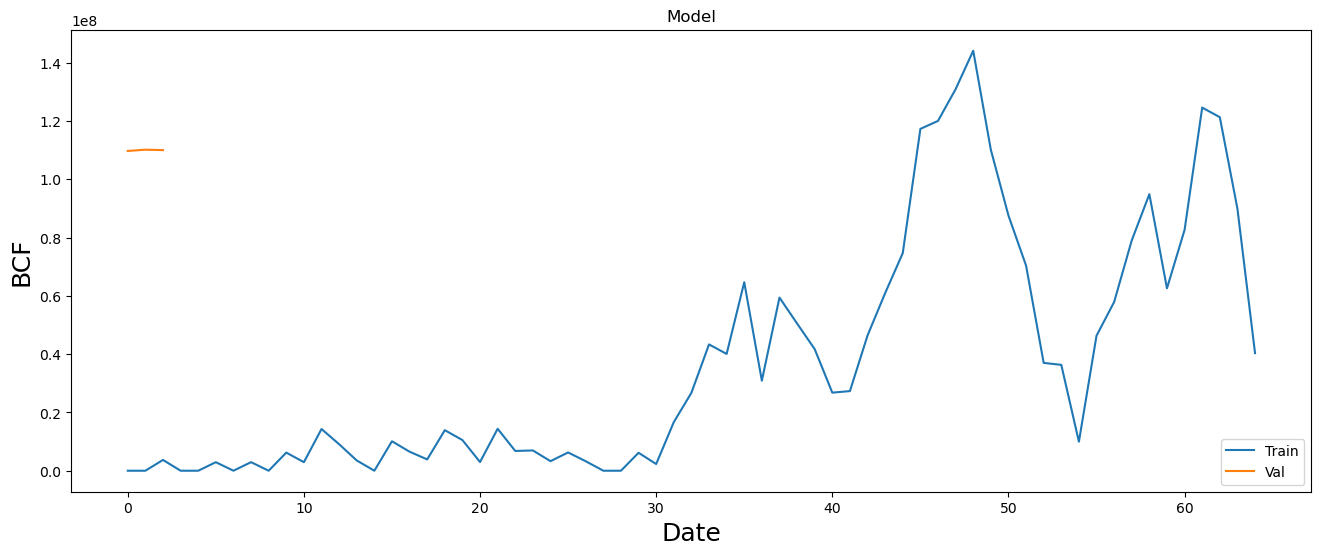

In [85]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('BCF', fontsize=18)

plt.plot(train)
plt.plot(valid['Predictions'])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [86]:
valid

65                                                57978578.0
66                                                55574309.0
67                                                85826811.0
Predictions    [[109743816.0], [110180950.0], [110036010.0]]
Name: Europe, dtype: object

In [61]:
df['Europe']

0            0.0
1            0.0
2      3700091.0
3            0.0
4            0.0
         ...    
63    89951948.0
64    40351822.0
65    57978578.0
66    55574309.0
67    85826811.0
Name: Europe, Length: 68, dtype: float64

In [55]:
train

0             0.0
1             0.0
2       3700091.0
3             0.0
4             0.0
         ...     
60     82660273.0
61    124635353.0
62    121339131.0
63     89951948.0
64     40351822.0
Name: Europe, Length: 65, dtype: float64

In [114]:
df['Europe']

0            0.0
1            0.0
2      3700091.0
3            0.0
4            0.0
         ...    
63    89951948.0
64    40351822.0
65    57978578.0
66    55574309.0
67    85826811.0
Name: Europe, Length: 68, dtype: float64